# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
import json

In [6]:
# Fetch current BTC price

btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18906787,
            "total_supply": 18906787,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 48920.0,
                    "volume_24h": 28692691675,
                    "market_cap": 926437117911,
                    "percentage_change_1h": 0.0665909283531597,
                    "percentage_change_24h": 6.11343179403627,
                    "percentage_change_7d": 4.76186853396918,
                    "percent_change_1h": 0.0665909283531597,
                    "percent_change_24h": 6.11343179403627,
                    "percent_change_7d": 4.76186853396918
                },
                "CAD": {
                    "price": 63268.236,
                    "volume_24h": 37108258143.2775,
                    "m

In [7]:
# Initialize variable for BTC price
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
print(btc_price)

48920.0


In [8]:
# Fetch current ETH price

eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118829808,
            "total_supply": 118829808,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 4037.36,
                    "volume_24h": 20470277148,
                    "market_cap": 480520825666,
                    "percentage_change_1h": -0.146254020281912,
                    "percentage_change_24h": 5.91397343762953,
                    "percentage_change_7d": 6.72682259321228,
                    "percent_change_1h": -0.146254020281912,
                    "percent_change_24h": 5.91397343762953,
                    "percent_change_7d": 6.72682259321228
                },
                "CAD": {
                    "price": 5221.517688,
                    "volume_24h": 26474209435.5084,
                 

In [9]:
# Initialize variable for ETH price
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

4037.36


In [10]:
# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58704.00
The current value of your 5.3 ETH is $21398.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares

my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [13]:
# Format current date as ISO format

today = pd.Timestamp('2021-09-10', tz='America/Chicago').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

closing_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame

closing_prices_df


AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-09-10 00:00:00-04:00  115.99  116.01  115.7801  115.87  2767552  451.04   

                                                            
                             high     low  close    volume  
time                                                        
2021-09-10 00:00:00-04:00  451.49  445.31  445.5  75763259

In [14]:
# Pick AGG and SPY close prices

agg_close_price = float(closing_prices_df['AGG']['close'])
spy_close_price = float(closing_prices_df['SPY']['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [15]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


### Savings Health Analysis

In [16]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data
assets_dict = {
    'amount': [round((my_btc_value + my_eth_value),2), round((my_agg_value + my_spy_value),2)]
}

# Create savings DataFrame

df_savings = pd.DataFrame(assets_dict, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,80102.01
shares,45449.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

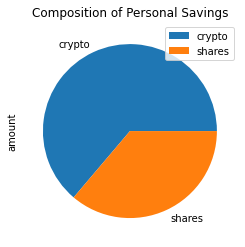

In [17]:
# Plot savings pie chart

df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

savings = df_savings.sum()
print(savings)

# Validate saving health

if savings.item() > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
elif savings.item() == emergency_fund:
    print(f'Congratulations!  You have achieved your goal of creating an emergency fund.')
elif savings.item() < emergency_fund:
    shortage = emergency_fund - savings.item()
    print(f'You are ${shortage} away from reaching your goal of having an emergency fund.')

amount    125551.01
dtype: float64
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_sims = 500
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data

MC_thirty.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995696,0.999376,1.005936,0.994068,1.011043,0.989123,0.993696,0.998714,1.000710,1.003026,...,1.002520,1.002506,1.006181,0.997113,1.008801,1.018967,0.993825,0.995814,1.002832,1.004437
2,0.996546,1.002300,0.999571,0.995559,1.001027,0.987986,0.977226,1.004805,0.996666,1.023073,...,1.004876,0.995353,1.013912,0.990715,1.002753,1.018318,0.990400,0.996293,0.989809,1.012301
3,0.995388,0.975816,0.999626,0.992624,1.008443,0.991233,0.987311,1.005576,0.997819,1.039415,...,0.999117,0.992196,0.993540,0.978913,0.989987,1.014721,0.991525,0.986320,0.991555,1.019941
4,0.989647,0.981758,1.003706,1.001845,1.004631,0.983567,1.001174,1.004100,0.982952,1.039064,...,0.998663,0.978329,0.996680,0.979543,0.994171,1.006901,0.995321,0.978775,0.990706,1.019047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.086800,7.007345,10.161217,3.528066,11.811069,4.270164,20.202757,15.717639,9.918503,13.690873,...,6.808368,10.444530,6.337608,14.606628,10.289007,4.635619,38.162618,8.661760,17.602110,11.827141
7557,18.971754,6.989991,10.301785,3.505003,11.719102,4.269531,20.087819,15.682211,9.906504,13.684922,...,6.809060,10.548241,6.342844,14.514819,10.253997,4.618542,38.060507,8.588802,17.913566,11.855814
7558,18.778138,6.965792,10.288769,3.568721,11.593648,4.297009,19.941527,15.732435,9.941207,13.672623,...,6.820949,10.494411,6.348646,14.510126,10.300193,4.591145,37.905714,8.510215,17.873150,11.922376
7559,18.796673,6.892754,10.314461,3.561922,11.549202,4.322198,19.906895,15.805403,9.986608,13.606678,...,6.832569,10.482524,6.341778,14.594805,10.242867,4.622573,37.996472,8.555012,17.805258,12.010273


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

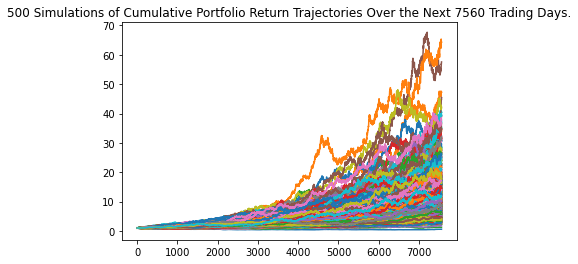

In [24]:
# Plot simulation outcomes

MC_thirty.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

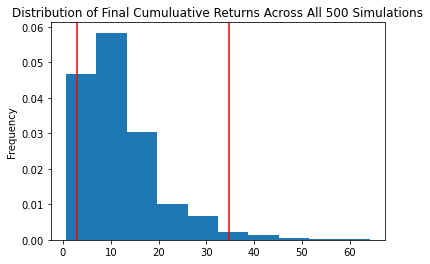

In [25]:
# Plot probability distribution and confidence intervals

MC_thirty.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results

summary = MC_thirty.summarize_cumulative_return()

# Print summary statistics

print(summary)

count           500.000000
mean             12.216976
std               8.447038
min               0.579535
25%               6.302687
50%              10.281478
75%              15.628956
max              64.322645
95% CI Lower      2.873680
95% CI Upper     34.722781
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment_1 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary[8]*initial_investment_1,2)
ci_upper = round(summary[9]*initial_investment_1,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57473.61 and $694455.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(summary[8]*initial_investment_2,2)
ci_upper = round(summary[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86210.41 and $1041683.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

num_sims = 500
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003986,0.985888,1.011308,0.985046,0.999073,0.997357,1.000171,0.995194,1.005365,1.002427,...,1.003489,0.997303,0.997739,0.989961,0.983895,0.993583,0.992610,0.989848,1.005759,0.994383
2,1.021027,0.981490,1.005134,0.969935,0.999097,0.998084,1.017797,1.000619,1.006139,0.999556,...,1.010107,1.006411,1.003165,0.989418,0.978724,0.971790,0.985720,0.990367,1.001387,0.994438
3,1.025923,0.968967,1.006057,0.959022,1.016855,1.001591,1.007547,0.989127,1.010170,0.995125,...,1.004564,1.000303,1.005860,0.993903,0.979982,0.982043,0.990340,0.986348,0.994032,1.000906
4,1.035127,0.966250,1.000285,0.971701,1.015288,1.002706,1.003162,0.995499,1.015659,1.001960,...,1.009117,1.005197,1.010822,0.981718,0.974420,0.974484,0.990581,0.993324,0.999502,1.015748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.157576,2.110158,1.890715,1.312980,1.478727,1.830509,1.233390,1.534455,1.010933,1.021762,...,1.287385,1.248810,1.201159,1.052106,1.688683,1.722208,0.868512,2.528702,1.093722,1.895982
1257,2.165042,2.124731,1.878942,1.312663,1.475304,1.800096,1.218594,1.528803,1.031382,1.017127,...,1.277641,1.240071,1.202549,1.052315,1.698879,1.734887,0.866578,2.536047,1.091515,1.885909
1258,2.161802,2.126627,1.866541,1.316594,1.467925,1.783578,1.238732,1.544006,1.021911,1.012139,...,1.265169,1.220467,1.202277,1.057184,1.699782,1.752403,0.869435,2.539420,1.089506,1.871651
1259,2.188045,2.140897,1.865943,1.320773,1.457074,1.780261,1.237879,1.543691,1.032649,1.015041,...,1.254350,1.206588,1.202714,1.048433,1.693056,1.763750,0.876181,2.575063,1.091016,1.874626


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

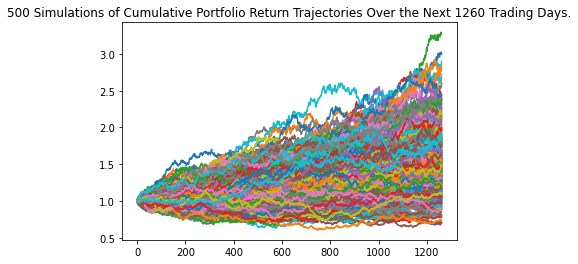

In [32]:
# Plot simulation outcomes

MC_five.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

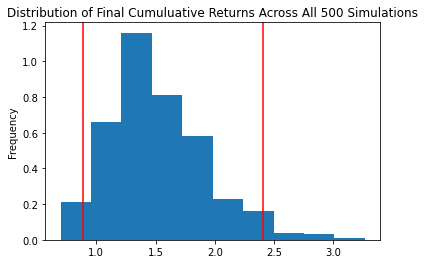

In [33]:
# Plot probability distribution and confidence intervals

MC_five.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results

summary = MC_five.summarize_cumulative_return()

# Print summary statistics

print(summary)

count           500.000000
mean              1.511007
std               0.408879
min               0.698559
25%               1.241451
50%               1.454179
75%               1.751490
max               3.266579
95% CI Lower      0.886442
95% CI Upper      2.408200
Name: 1260, dtype: float64


In [35]:
# Set initial investment

initial_investment_3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(summary[8]*initial_investment_3,2)
ci_upper_five = round(summary[9]*initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53186.53 and $144492.01


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

num_sims = 500
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003761,0.996616,0.992304,0.987259,0.999602,1.003454,1.003024,1.004657,0.999837,1.007334,...,1.006141,0.988270,1.005319,1.014587,0.994905,1.013150,1.004837,1.008583,0.996396,1.000766
2,0.995824,1.002236,0.993373,0.994392,0.998374,1.008500,0.997999,0.992070,0.996881,1.007066,...,1.010784,0.993111,1.012449,1.022574,0.990628,1.015056,0.996575,1.017680,0.988779,1.011985
3,0.997970,1.005531,0.997314,1.002388,0.997430,1.017938,0.997055,1.002426,0.998668,1.011093,...,1.021528,0.999740,1.013836,1.017485,0.994813,1.024214,0.996715,1.005111,0.995774,1.011231
4,1.005297,1.005368,0.993955,1.003685,0.998305,1.028861,0.995695,0.988414,1.012055,1.018545,...,1.032220,1.001724,1.012891,1.010593,0.993002,1.032426,0.988617,1.007016,0.994565,1.015109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.657489,1.444074,1.321503,4.344623,2.680950,1.575356,3.972276,2.418933,1.685573,1.304255,...,2.037688,1.824173,2.172195,2.619066,4.236100,3.828123,1.300406,2.449592,2.418610,3.387263
2517,1.671155,1.441294,1.329869,4.378614,2.676250,1.580779,3.966421,2.429142,1.680497,1.279674,...,2.030611,1.811749,2.180451,2.625987,4.257677,3.825659,1.315563,2.496715,2.437038,3.343626
2518,1.647362,1.455879,1.310785,4.395883,2.668647,1.582660,4.012928,2.401314,1.703249,1.275780,...,2.034049,1.810479,2.180901,2.628139,4.300226,3.776836,1.312970,2.508215,2.444951,3.328836
2519,1.637094,1.446159,1.319807,4.375434,2.677389,1.583493,3.974951,2.403788,1.705112,1.280522,...,2.043093,1.817306,2.207536,2.626342,4.248411,3.779978,1.333267,2.524248,2.447871,3.337606


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

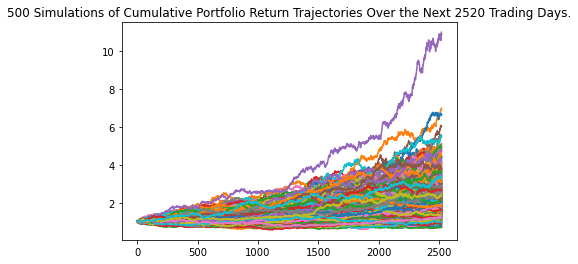

In [38]:
# Plot simulation outcomes

MC_ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

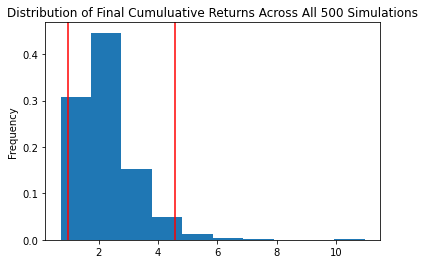

In [39]:
# Plot probability distribution and confidence intervals

MC_ten.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results

summary = MC_ten.summarize_cumulative_return()

# Print summary statistics

print(summary)

count           500.000000
mean              2.269822
std               1.002651
min               0.712418
25%               1.623068
50%               2.090051
75%               2.686418
max              10.979063
95% CI Lower      0.963704
95% CI Upper      4.576435
Name: 2520, dtype: float64


In [41]:
# Set initial investment

initial_investment_4 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(summary[8]*initial_investment_4,2)
ci_upper_ten = round(summary[9]*initial_investment_4,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $57822.26 and $274586.08
